# Bikes & Cycling Accessories Organisation's Transactions Data Analysis

## Table of Contents

1. **[Project Background](#1)**
2. **[Data Cleaning](#2)**
3. **[Transaction Analysis](#3)**
4. **[Product Analysis](#4)**
5. **[Cohort Analysis](#5)**
6. **[Churn Analysis](#6)**

## Part 1. Project Background <a name= '1'></a>

The client(A medium size bikes & cycling accessories organisation) provided with 3 datasets:
Customer Demographic, 
Customer Addresses,
Transactions data in the past 3 months,
We decide to start the preliminary data exploration and identify ways to decrese churn rate.

## Part 2. Data Cleaning <a name= '2'></a>

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from datetime import timedelta
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

#### 2.1   "transactions" Data Cleaning

In [2]:
# Loading dataset
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions')

In [3]:
# View data
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [4]:
# make the first row as columns names
transaction_df.columns = transaction_df.iloc[0]
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [5]:
# drop the first row
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [7]:
## Get descriptive statistics
transaction_df.describe(include = 'all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [8]:
#Dealing with missing values of "Transactions"
# Replace the ' 's with NaN
transaction_df = transaction_df.replace(" ",np.NaN)
transaction_df['online_order'] = transaction_df['online_order'].fillna('unknown')
# Impute the missing values with mean imputation
transaction_df = transaction_df.fillna(transaction_df.mean())
# Count the number of NaNs in the dataset to verify
print(transaction_df.isnull().values.sum())

788


In [9]:
print(transaction_df.info())
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB
None
0


In [10]:
transaction_df.isna().sum()

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [11]:
transaction_df['online_order'].value_counts()

True       9829
False      9811
unknown     360
Name: online_order, dtype: int64

#### 2.2  "NewCustomerList" Data Cleaning 

In [12]:
# Load "NewCustomerList" dataset
customer_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','NewCustomerList')

In [13]:
#view the data
customer_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.58,0.5800,0.725000,0.616250,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.73,0.7300,0.730000,0.730000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.0000,1.000000,1.000000,4.0,4,1.703125


In [14]:
# make the first row as columns names
customer_df.columns = customer_df.iloc[0]

In [15]:
#drop the first row
customer_df.drop(index=customer_df.index[0], axis=0, inplace=True)
customer_df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.58,0.5800,0.725000,0.616250,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.73,0.7300,0.730000,0.730000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.0000,1.000000,1.000000,4.0,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.80,0.8000,1.000000,1.000000,4.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.91,0.9100,0.910000,0.910000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.46,0.4600,0.575000,0.488750,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.64,0.8000,0.800000,0.800000,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.53,0.6625,0.662500,0.563125,997.0,997,0.357


In [16]:
#check the missing values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   object 
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   object 
 11  address                       

In [17]:
#drop columns[[16, 17, 18,19,20]]
customer_df = customer_df.drop(customer_df.columns[[16, 17, 18,19,20]],axis = 1)

In [18]:
customer_df.describe(include = 'all')

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
count,1000,971,1000,1000,983,894,835,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000.0000
unique,940,961,3,100,961,184,9,3,1,2,23,1000,522,3,1,16,324,319.0000
top,Rozamond,Sissel,Female,60,1965-07-03,Associate Professor,Financial Services,Mass Customer,N,No,9,45 Shopko Center,2145,NSW,Australia,9,760,0.6375
freq,3,2,513,20,2,15,203,508,1000,507,79,1,9,506,1000,173,13,13.0000


In [19]:
#Dealing with missing values of "NewCustomerList"
#check the missing values
customer_df.isna().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [20]:
# Replace the ' 's with NaN
customer_df = customer_df.replace(" ",np.NaN)

In [21]:
customer_df['DOB'] = customer_df['DOB'].astype('datetime64')

In [22]:
# calculate the age of customers
customer_df['age'] = customer_df['DOB'].apply(
               lambda x: pd.datetime.now().year  - x.year - 
               ((pd.datetime.now().month, pd.datetime.now().day) < (x.month, x.day)) 
               )

In [23]:
# Column'age':Impute the missing values with mean
customer_df['age'] = customer_df['age'].fillna(customer_df['age'].mean())
# Column'DOB': Impute the missing values with corresponding DOB of age
customer_df['DOB'] = customer_df['DOB'].fillna('1900-01-01')

In [24]:
# Column'last_name':Impute the missing values with 'missing'(count:17)
customer_df['last_name'] = customer_df['last_name'].fillna('missing')                                   
#column'job_title':Impute the missing values with 'unknown'(count:106)
customer_df['job_title'] = customer_df['job_title'].fillna('unknown')
#column'job_industry_category' :Impute the missing values with 'unknown'(count:165)
customer_df['job_industry_category'] = customer_df['job_industry_category'].fillna('unknown')
# Count the number of NaNs in the dataset to verify
print(customer_df.isna().sum())

0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
dtype: int64


#### 2.3 "CustomerDemographic" Data Cleaning 

In [25]:
# Loading dataset
customer_old_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')

In [26]:
customer_old_df.isna().sum()

customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
age                                      1
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [27]:
customer_old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  3999 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [28]:
customer_old_df.describe(include = 'all')

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
count,4000.000000,4000,4000,4000.000000,3913,3999.000000,3494,3344,4000,4000,4000,3913.000000
unique,NaN,3998,3,NaN,3448,NaN,195,9,3,2,2,NaN
top,NaN,Lorettalorna,Female,NaN,1978-01-30 00:00:00,NaN,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,NaN
freq,NaN,2,2039,NaN,7,NaN,45,799,2000,3998,2024,NaN
first,NaN,NaN,NaN,NaN,1843-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.500000,NaN,NaN,48.890000,NaN,44.054514,NaN,NaN,NaN,NaN,NaN,10.657041
std,1154.844867,NaN,NaN,28.715005,NaN,16.858429,NaN,NaN,NaN,NaN,NaN,5.660146
min,1.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,1000.750000,NaN,NaN,24.000000,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,6.000000


In [29]:
#Dealing with missing values of "CustomerDemographic"
# Replace the ' 's with NaN
customer_old_df = customer_old_df.replace(" ",np.NaN)

In [30]:
# Column'age':Impute the missing values with mean
customer_old_df['age'] = customer_old_df['age'].fillna(customer_old_df['age'].mean())


In [31]:
#column'job_title':Impute the missing values with 'unknown'(count:506)
customer_old_df['job_title'] = customer_old_df['job_title'].fillna('unknown')
#column'job_industry_category':Impute the missing values with 'unknown'(count:656)
customer_old_df['job_industry_category'] = customer_old_df['job_industry_category'].fillna('unknown')
#column'tenure': Impute the missing values with mean(count:87)  
customer_old_df['tenure'] = customer_old_df['tenure'].fillna(customer_old_df['tenure'].mean())

In [32]:
# calculate the DOB from age of customer
def get_dob(age):
    date_s = (str(pd.datetime.now().year - int(age)) + '-' + str(pd.datetime.now().month) + '-'
                + str(pd.datetime.now().day))
    return datetime.strptime(date_s, '%Y-%m-%d')


In [33]:
# Column'DOB': Impute the missing values with corresponding DOB of age
customer_old_df['DOB'] = np.where(customer_old_df['DOB'].isna(),
                                  customer_old_df['age'].apply(lambda x: get_dob(x)),
                                  customer_old_df['DOB'])


In [34]:
customer_old_df.sample()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1018,3445,Craggy,Male,62,1966-06-23,53.0,Database Administrator I,Financial Services,Affluent Customer,N,Yes,11.0


In [35]:
customer_old_df.isna().sum()

customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

#### 2.4  "CustomerAddress" Data Cleaning

In [36]:
# Loading dataset
address_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

In [37]:
address_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [38]:
# make the first row as columns names
address_df.columns = address_df.iloc[0]
# drop the first row
address_df.drop(index=address_df.index[0], axis=0, inplace=True)
address_df

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [39]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [40]:
address_df.describe()

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,1,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


<Axes: >

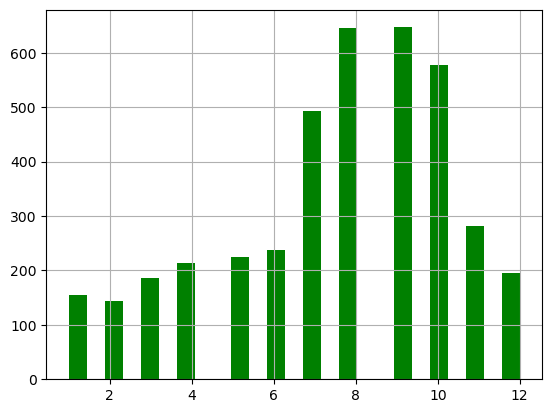

In [41]:
address_df['property_valuation'].hist(bins = 25, color = 'g')

<Axes: >

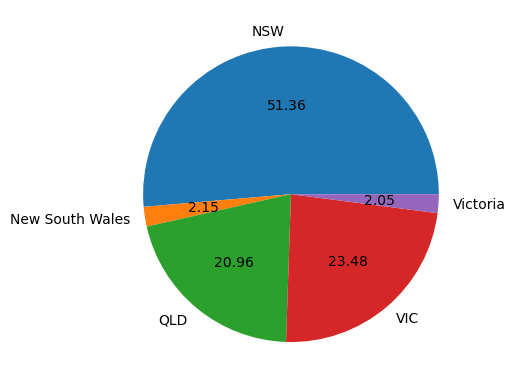

In [42]:
address_df.groupby('state').size().plot(kind='pie', autopct='%.2f')

## Part 3. Transaction Analysis <a name= '3'></a>

In [43]:
#get month of transaction
def get_month(x):
    return str(x.date())[0:7]

In [44]:
transaction_df['tran_month'] = transaction_df['transaction_date'].apply(lambda x: get_month(x))

In [45]:
transaction_df['cohort_month'] = (
                        transaction_df.groupby(['customer_id'])['tran_month']
                        .transform(min))

In [46]:
transaction_df['online_order'].value_counts()

True       9829
False      9811
unknown     360
Name: online_order, dtype: int64

In [47]:
df_sum = (transaction_df.groupby(['tran_month','online_order'], as_index=False)
        .agg(transaction_crt = ('transaction_id','count'),
            total_price = ('list_price','sum'),
            total_cost = ('standard_cost','sum'),
            )
         )
df_sum['profit'] = df_sum['total_price'] - df_sum['total_cost']
df_sum

,tran_month,online_order,transaction_crt,total_price,total_cost,profit
0,2017-01,False,810,898539.26,443446.991720,455092.268280
1,2017-01,True,841,932363.63,465797.936463,466565.693537
2,2017-01,unknown,31,35156.37,20819.990000,14336.380000
3,2017-02,False,786,854718.13,441232.627805,413485.502195
4,2017-02,True,803,904223.82,456905.968659,447317.851341
5,2017-02,unknown,34,39503.88,21199.050000,18304.830000
6,2017-03,False,837,937459.85,481610.980366,455848.869634
7,2017-03,True,787,845959.71,420708.717317,425250.992683
8,2017-03,unknown,32,34197.94,20267.090000,13930.850000
9,2017-04,False,802,871976.45,428492.022561,443484.427439


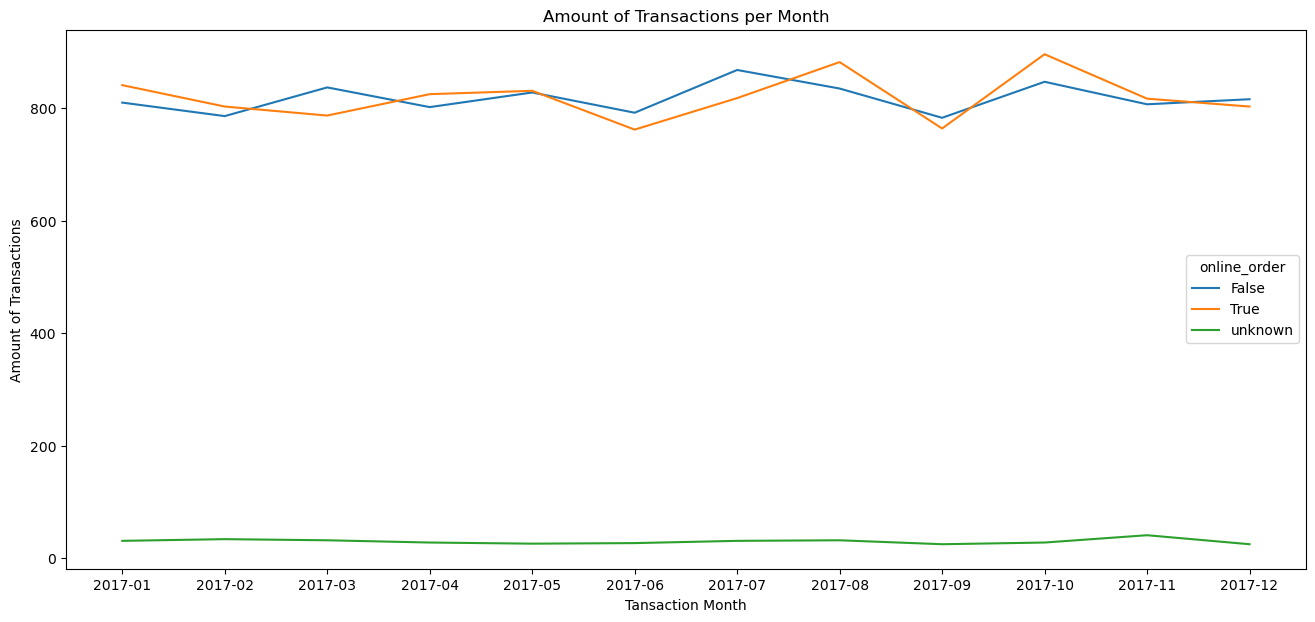

In [48]:
plt.figure(figsize=(16,7))
plt.title('Amount of Transactions per Month')
plt.xlabel('Tansaction Month')
plt.ylabel('Amount of Transactions')
sns.lineplot(data=df_sum, x='tran_month',
               y='transaction_crt', hue='online_order')
plt.show()

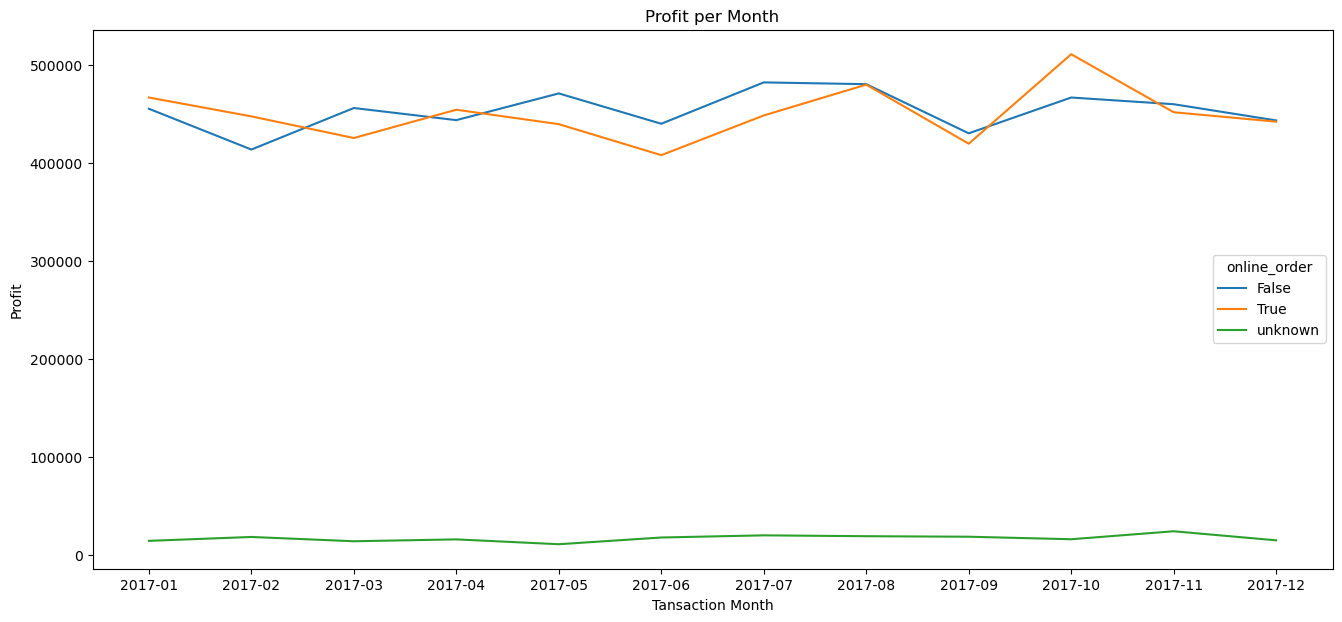

In [49]:
plt.figure(figsize=(16,7))
plt.title('Profit per Month')
plt.xlabel('Tansaction Month')
plt.ylabel('Profit')
#plt.plot('tran_month','profit',data=df_sum,marker='o',color='orange',linewidth=2)
sns.lineplot(data=df_sum, x='tran_month',
               y='profit', hue='online_order')
plt.show()

In [50]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,tran_month,cohort_month
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02,2017-02
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05,2017-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10,2017-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08,2017-02
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10,2017-01


## Part 4. Product Analysis <a name= '4'></a>

In [51]:
most_selling_products = transaction_df['product_id'].value_counts()[:20]
most_selling_products

0     1378
3      354
1      311
35     268
38     267
4      241
2      240
90     225
12     224
80     223
5      222
43     216
77     215
69     215
27     215
53     214
45     213
36     211
92     211
50     209
Name: product_id, dtype: int64

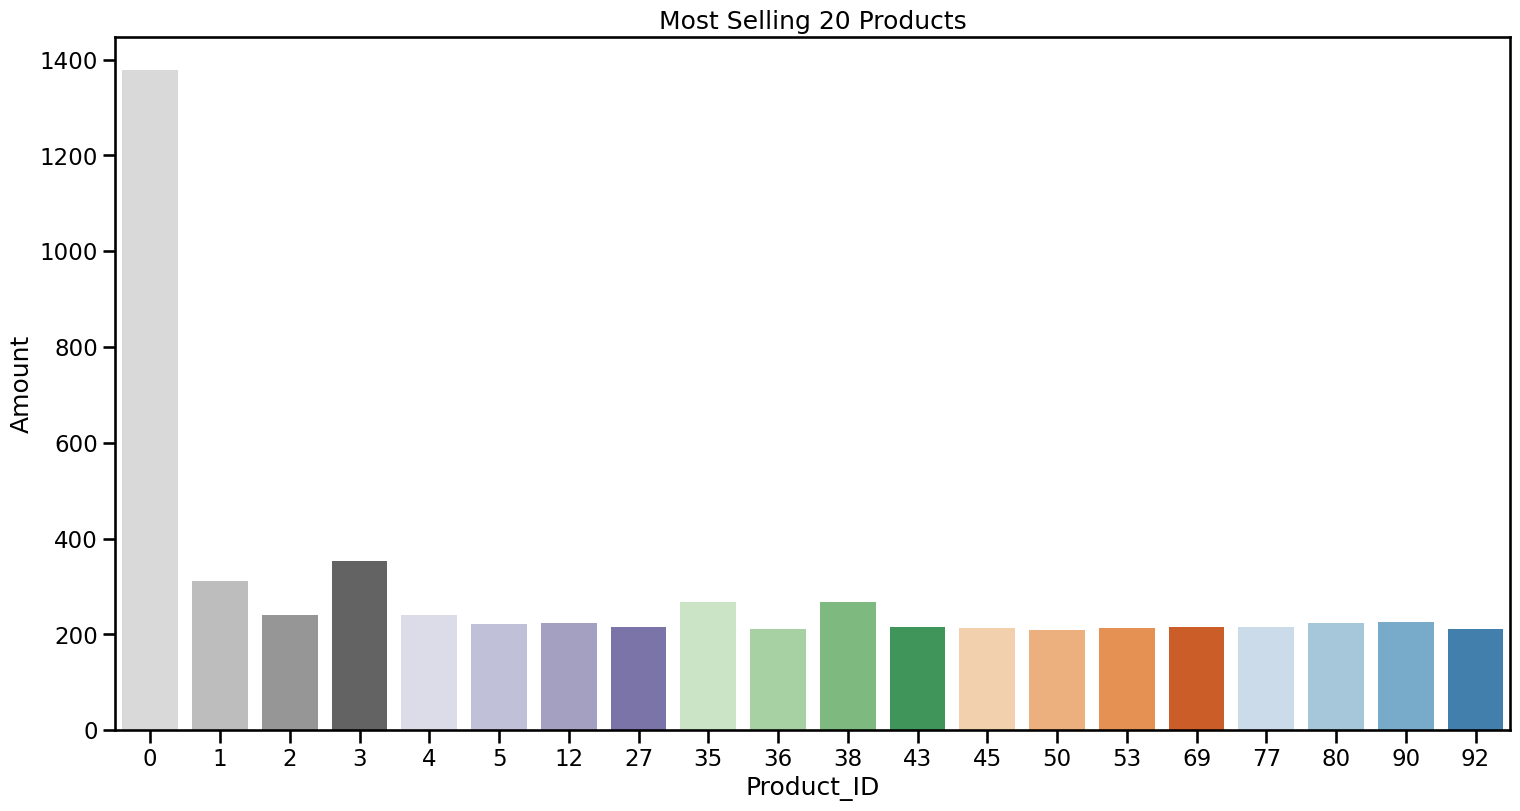

In [52]:
plt.figure(figsize = (18,9))
sns.set_context("talk")
sns.barplot(x = most_selling_products.index, y = most_selling_products.values,palette = "tab20c_r")
plt.xlabel("Product_ID")
plt.ylabel("Amount")
plt.title("Most Selling 20 Products")

plt.show()

In [53]:
most_selling_brand = transaction_df['brand'].value_counts()
most_selling_brand

Solex             4450
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

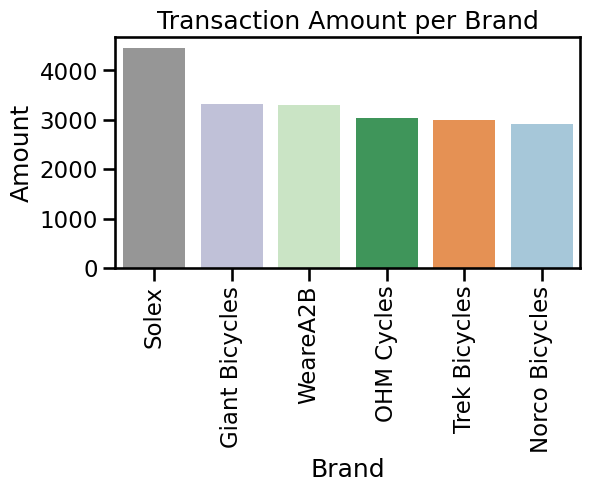

In [54]:
plt.figure(figsize = (6,3))
sns.set_context("talk")
sns.barplot(x = most_selling_brand.index, y = most_selling_brand.values,palette = "tab20c_r")
plt.xlabel("Brand")
plt.xticks(rotation='vertical')
plt.ylabel("Amount")
plt.title("Transaction Amount per Brand")

plt.show()

## Part 5.Cohort Analysis <a name= '5'></a>

In [55]:
def get_elements(df,column):
    year = df[column].astype('datetime64').dt.year
    month = df[column].astype('datetime64').dt.month
    return year,month 

In [56]:
year,month = get_elements(transaction_df,'tran_month')


In [57]:
year_c,month_c = get_elements(transaction_df,'cohort_month')

In [58]:
transaction_df['cohort_index'] = (year - year_c) * 12 + month - month_c + 1

In [59]:
df = (
    transaction_df.groupby(['cohort_month','cohort_index'], as_index=False)
        .agg(user_crt = ('customer_id','nunique'),
            transaction_crt = ('transaction_id','count'))
)
df

,cohort_month,cohort_index,user_crt,transaction_crt
0,2017-01,1,1354,1682
1,2017-01,2,486,613
2,2017-01,3,508,633
3,2017-01,4,509,632
4,2017-01,5,502,649
...,...,...,...,...
73,2017-10,2,6,9
74,2017-10,3,8,9
75,2017-11,1,13,16
76,2017-11,2,5,6


In [60]:
#create a pivot table
cohort_table = df.pivot(index = 'cohort_month', columns = 'cohort_index', values = 'user_crt' )
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
retention = cohort_table.divide(cohort_table.iloc[:,0],axis = 0)
retention = retention.round(3)

In [62]:
retention

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01,1.0,0.359,0.375,0.376,0.371,0.357,0.383,0.391,0.369,0.392,0.367,0.381
2017-02,1.0,0.406,0.372,0.391,0.360,0.372,0.385,0.351,0.411,0.385,0.370,NaN
2017-03,1.0,0.345,0.360,0.345,0.376,0.380,0.355,0.438,0.390,0.374,NaN,NaN
2017-04,1.0,0.330,0.360,0.455,0.426,0.360,0.423,0.375,0.393,NaN,NaN,NaN
2017-05,1.0,0.405,0.386,0.414,0.338,0.352,0.348,0.386,NaN,NaN,NaN,NaN
2017-06,1.0,0.369,0.361,0.385,0.377,0.377,0.434,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.338,0.377,0.416,0.481,0.312,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.373,0.412,0.333,0.255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.304,0.304,0.391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
retention.index 

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='cohort_month')

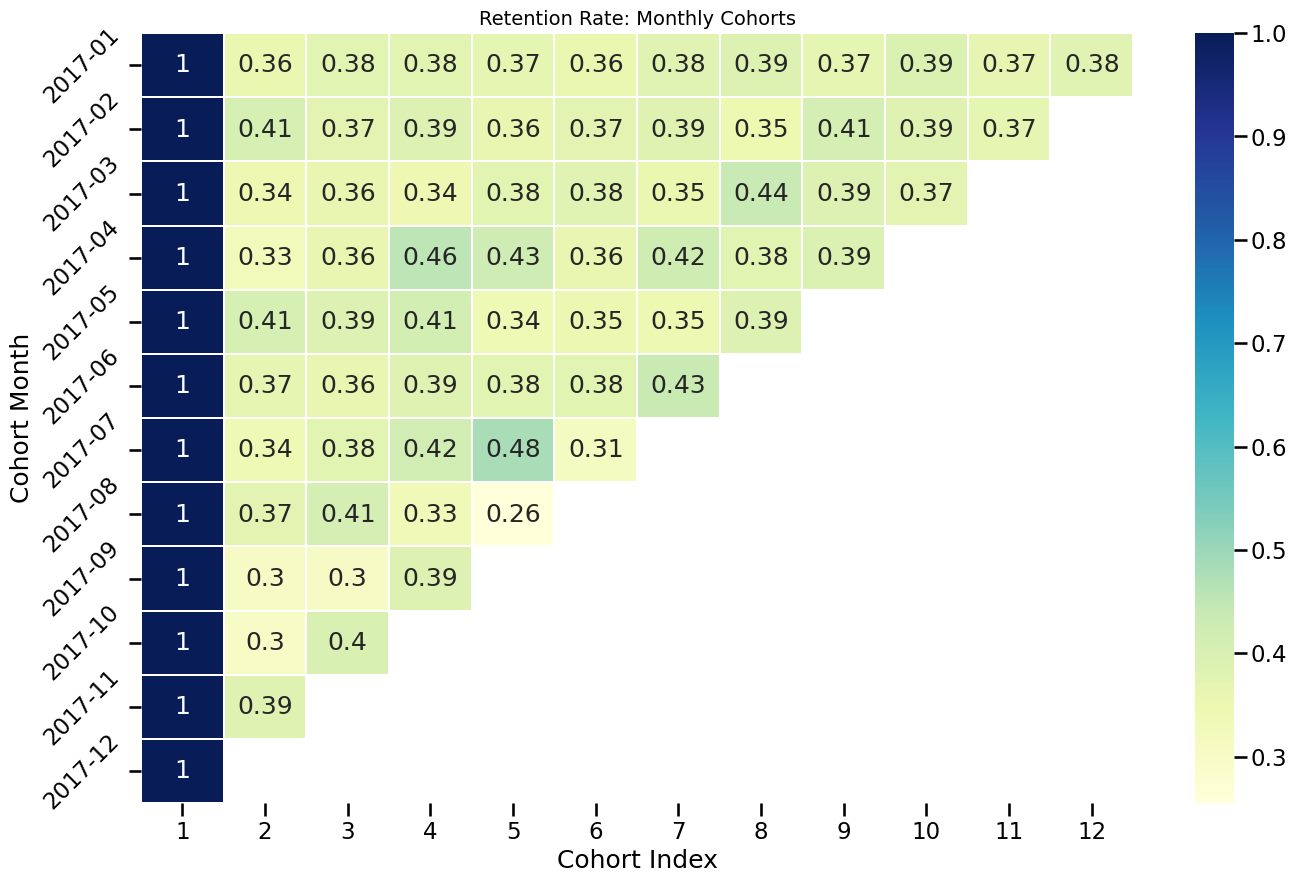

In [64]:
 #Visualize cohort table
plt.figure(figsize = (16,10))
# Adding a title
plt.title('Retention Rate: Monthly Cohorts', fontsize = 14)
#visualize the results in heatmap
sns.heatmap(retention,annot = True,cmap='YlGnBu',linewidths=0.30)
#Adding x and y labels
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation=45)
plt.show()

## Part 5.Root Cause Analysis <a name= '6'></a>

#### Merging with customer table

In [65]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,tran_month,cohort_month,cohort_index
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02,2017-02,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05,2017-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10,2017-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08,2017-02,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10,2017-01,10


In [66]:
customer_old_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,44.054514,Legal Assistant,IT,Affluent Customer,N,No,20.000000
1,144,Jory Barrabeale,U,71,1903-09-22,120.000000,Environmental Tech,IT,Mass Customer,N,No,10.657041
2,168,Reggie Broggetti,U,8,1903-09-22,120.000000,General Manager,IT,Affluent Customer,N,Yes,10.657041
3,267,Edgar Buckler,U,53,1903-09-22,120.000000,unknown,IT,High Net Worth,N,No,10.657041
4,290,Giorgio Kevane,U,42,1903-09-22,120.000000,Senior Sales Associate,IT,Mass Customer,N,No,10.657041


In [67]:
df_48 = transaction_df[(transaction_df['cohort_month'] == '2017-07') & (transaction_df['cohort_index'] == 5)]
df_31 = transaction_df[(transaction_df['cohort_month'] == '2017-07') & (transaction_df['cohort_index'] == 6)]

In [68]:
df_decrease = df_48.merge(df_31, how ='left', on = 'customer_id')
df_decrease

,transaction_id_x,product_id_x,customer_id,transaction_date_x,online_order_x,order_status_x,brand_x,product_line_x,product_class_x,product_size_x,...,brand_y,product_line_y,product_class_y,product_size_y,list_price_y,standard_cost_y,product_first_sold_date_y,tran_month_y,cohort_month_y,cohort_index_y
0,1751,22,2730,2017-11-21,False,Approved,WeareA2B,Standard,medium,medium,...,Trek Bicycles,Standard,high,medium,495.72,297.43,42105.0,2017-12,2017-07,6.0
1,1751,22,2730,2017-11-21,False,Approved,WeareA2B,Standard,medium,medium,...,OHM Cycles,Standard,medium,medium,1227.34,770.89,34556.0,2017-12,2017-07,6.0
2,1751,22,2730,2017-11-21,False,Approved,WeareA2B,Standard,medium,medium,...,Solex,Standard,medium,large,1061.56,733.58,34170.0,2017-12,2017-07,6.0
3,2161,98,2694,2017-11-22,False,Approved,Trek Bicycles,Standard,high,medium,...,WeareA2B,Standard,medium,medium,752.64,205.36,42218.0,2017-12,2017-07,6.0
4,2562,35,2514,2017-11-14,True,Approved,Giant Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3036,27,2730,2017-11-21,False,Approved,Trek Bicycles,Standard,medium,medium,...,Trek Bicycles,Standard,high,medium,495.72,297.43,42105.0,2017-12,2017-07,6.0
6,3036,27,2730,2017-11-21,False,Approved,Trek Bicycles,Standard,medium,medium,...,OHM Cycles,Standard,medium,medium,1227.34,770.89,34556.0,2017-12,2017-07,6.0
7,3036,27,2730,2017-11-21,False,Approved,Trek Bicycles,Standard,medium,medium,...,Solex,Standard,medium,large,1061.56,733.58,34170.0,2017-12,2017-07,6.0
8,3398,51,1809,2017-11-20,False,Approved,OHM Cycles,Standard,high,medium,...,Giant Bicycles,Standard,high,medium,1129.13,677.48,41701.0,2017-12,2017-07,6.0
9,3992,1,3172,2017-11-05,False,Approved,Giant Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_decrease = df_decrease.groupby(['customer_id'],as_index = False)[['transaction_id_x','transaction_id_y']].count()

In [70]:
df_decrease = df_decrease[df_decrease['transaction_id_y'] == 0]

In [71]:
#customers who churned 
df_churn = df_decrease.merge(customer_old_df,how ='left', on = 'customer_id')

In [77]:
# join with address table
df_churn = df_churn.merge(address_df,how = 'left',on = 'customer_id')

#### visualize churn customers

In [78]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          27 non-null     object        
 1   transaction_id_x                     27 non-null     int64         
 2   transaction_id_y                     27 non-null     int64         
 3   name                                 27 non-null     object        
 4   gender                               27 non-null     object        
 5   past_3_years_bike_related_purchases  27 non-null     int64         
 6   DOB                                  27 non-null     datetime64[ns]
 7   age                                  27 non-null     float64       
 8   job_title                            27 non-null     object        
 9   job_industry_category                27 non-null     object        
 10  wealth_segment  

<Axes: xlabel='owns_car', ylabel='past_3_years_bike_related_purchases'>

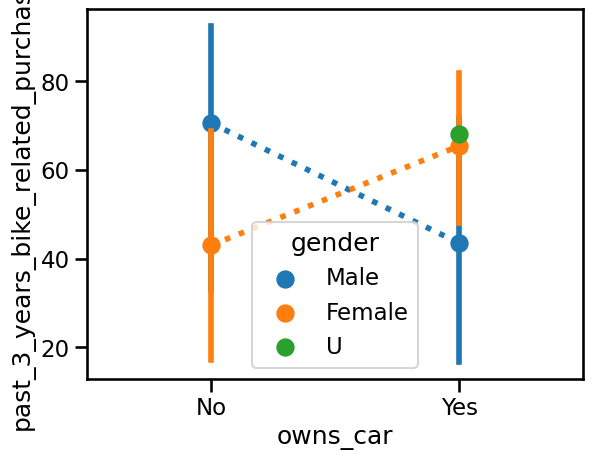

In [79]:
sns.pointplot(x='owns_car', y='past_3_years_bike_related_purchases', hue='gender', data=df_churn,  estimator=np.mean, ci=99,
                 n_boot=1000,  markers="o",
                 linestyles=":")

<Axes: >

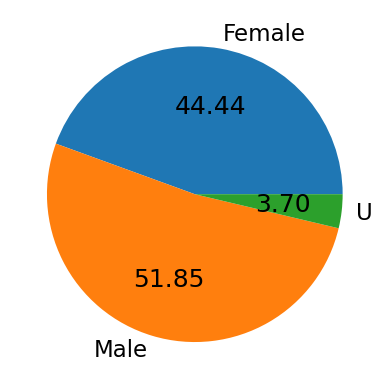

In [80]:
df_churn.groupby('gender').size().plot(kind='pie', autopct='%.2f')

<Axes: >

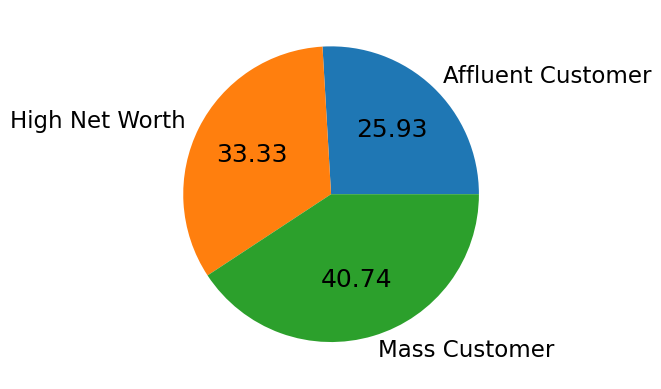

In [81]:
df_churn.groupby('wealth_segment').size().plot(kind='pie', autopct='%.2f')

<Axes: >

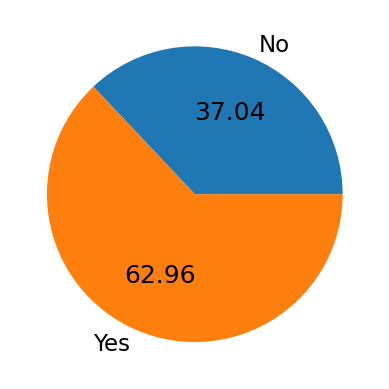

In [82]:
df_churn.groupby('owns_car').size().plot(kind='pie', autopct='%.2f')

<Axes: >

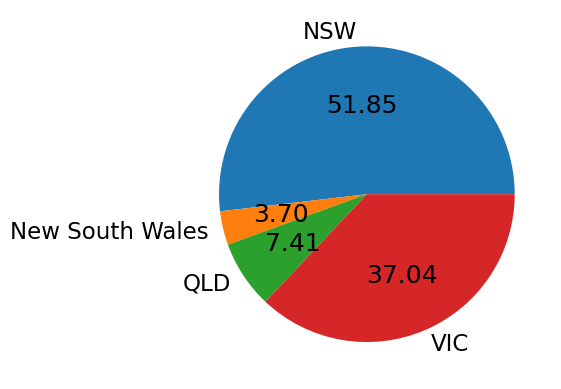

In [83]:
df_churn.groupby('state').size().plot(kind='pie', autopct='%.2f')

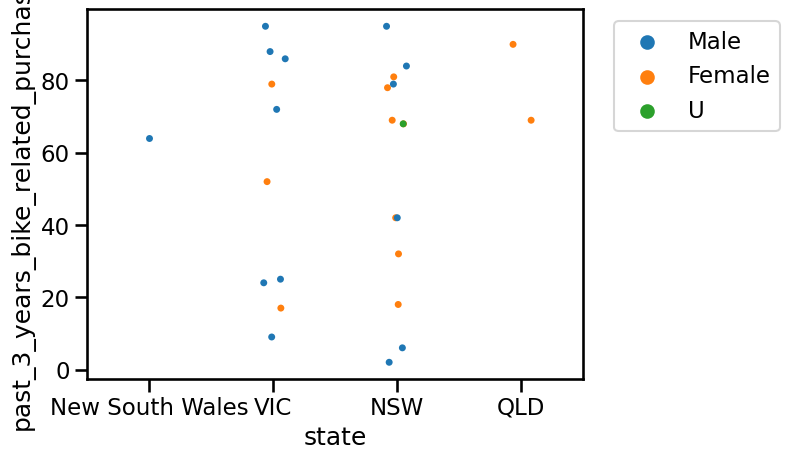

In [87]:
sns.stripplot(x='state', y='past_3_years_bike_related_purchases', hue='gender', data=df_churn,
                      color=None, palette=None, size=5,
                      edgecolor="gray", linewidth=0,
                      ax=None)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

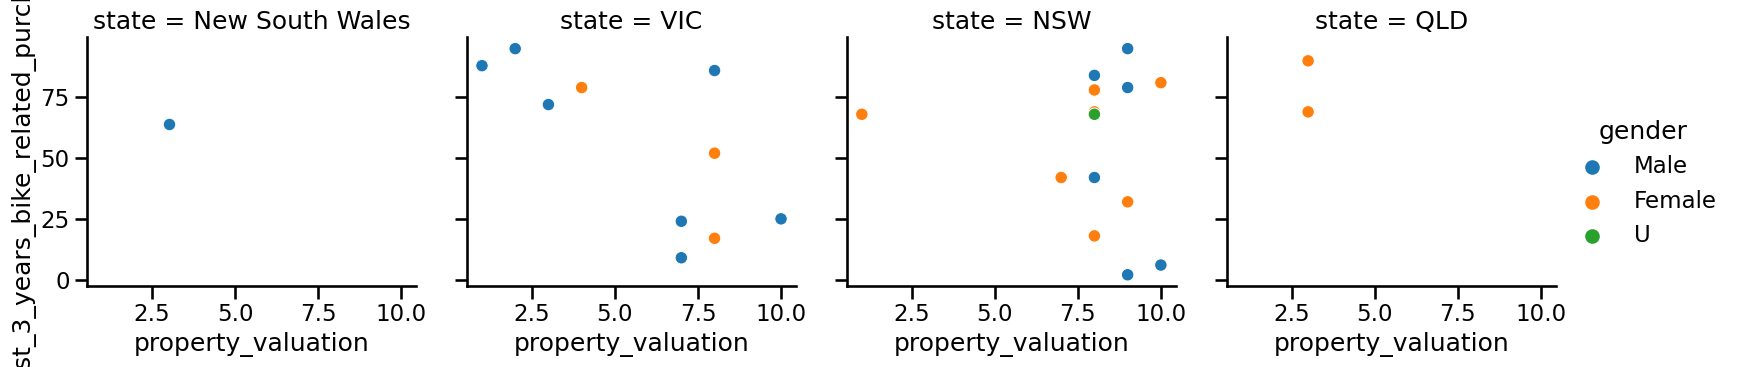

In [88]:
sns.color_palette('pastel')
ax = sns.relplot(data=df_churn, kind='scatter', x='property_valuation', y='past_3_years_bike_related_purchases', hue='gender', col='state', height=4)
ax.set(xlabel="property_valuation")
plt.show()